In [2]:
print("hello")

hello


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [4]:
x,y=make_classification(n_samples=4000,n_features=5,n_classes=2,random_state=42)

In [5]:
x

array([[ 1.43700269, -0.98909551, -1.57256607, -1.431387  ,  0.44793073],
       [ 1.60622315, -1.22020689, -1.84978028, -1.676504  ,  0.19200424],
       [-0.32090754, -1.22824276, -0.8121761 , -0.64812025,  1.69762378],
       ...,
       [-0.90711424,  0.94323326,  1.2486719 ,  1.1165162 , -0.4352482 ],
       [ 0.5282995 , -1.40488314, -1.41405513, -1.22161773,  1.27189955],
       [ 0.15397507, -0.34920318, -0.36375885, -0.3158047 , -0.26060833]],
      shape=(4000, 5))

In [6]:
y

array([0, 0, 0, ..., 1, 0, 0], shape=(4000,))

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [8]:
dt=DecisionTreeClassifier(random_state=42)

In [9]:
dt.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [10]:
y_pred=dt.predict(x_test)

In [11]:
cm=confusion_matrix(y_test,y_pred)

In [12]:
cm

array([[567,  38],
       [ 38, 557]])

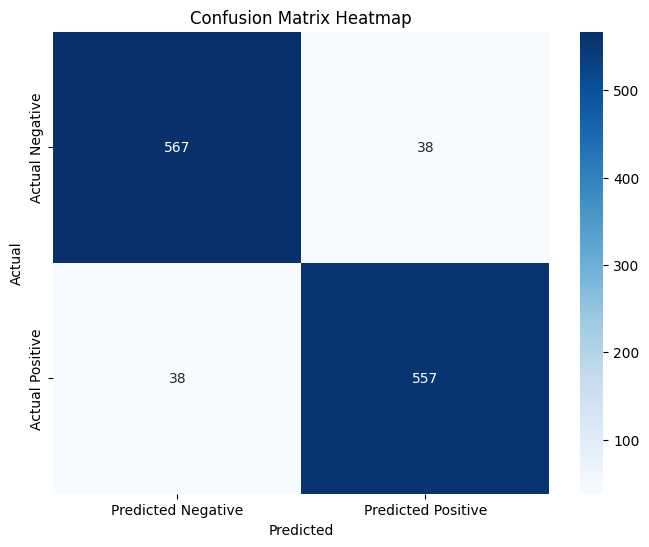

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Predicted Negative','Predicted Positive'],yticklabels=['Actual Negative','Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [14]:
tn,fp,fn,tp=cm.ravel()

In [15]:
tn,fp,fn,tp

(np.int64(567), np.int64(38), np.int64(38), np.int64(557))

In [16]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [17]:
print('Accuracy Score: ',accuracy)
print('Precision Score: ',precision)
print('Recall Score: ', recall)
print('F1 Score: ',f1)

Accuracy Score:  0.9366666666666666
Precision Score:  0.9361344537815126
Recall Score:  0.9361344537815126
F1 Score:  0.9361344537815126


In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       605
           1       0.94      0.94      0.94       595

    accuracy                           0.94      1200
   macro avg       0.94      0.94      0.94      1200
weighted avg       0.94      0.94      0.94      1200



In [19]:
from sklearn.metrics import RocCurveDisplay


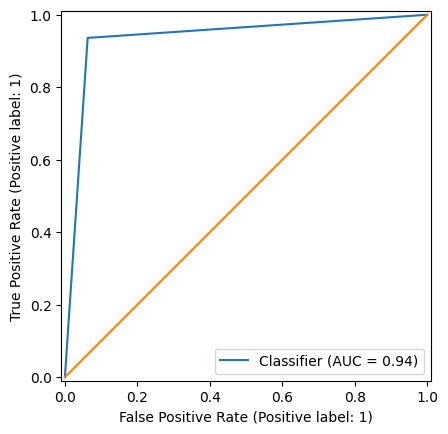

In [20]:
RocCurveDisplay.from_predictions(y_test,dt.predict(x_test))
plt.plot([0,1],[0,1])
plt.show()